In [1]:
import numpy as np
import pandas as pd
import sklearn.mixture as mix
from sklearn import preprocessing
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eco_indic_df = pd.read_pickle('./data/eco_indic.pkl')

In [3]:
try:
    from data_processing import stock_indic_processing
except:
    os.chdir("./src/")
    from data_processing import stock_indic_processing
(spy, spy_indic_df) = stock_indic_processing('spy')

[*********************100%***********************]  1 of 1 completed


In [4]:
# a plot function
def plot_regimes(df, num_regimes):
    fig = plt.figure(figsize=(25,9))
    colors = sns.color_palette("muted", num_regimes)
    for i in range(0, num_regimes):
        tmp = df[df["state"]==i]['Adj Close']
        tmp = tmp.asfreq('D')
        plt.scatter(tmp.index, tmp, color = colors[i], label=i)
        plt.legend(prop={'size': 15})
    return fig

In [5]:
eco_indic_df.head()

,cpi,inflation_expectation,consumer_sentiment,treasury3month,treasury5year,federal_funds_rate,treasury10year,unemployment,treasury2year
date,,,,,,,,,
1990-02-01,128.0,4.1,89.5,8.00,8.42,8.24,8.47,5.3,8.37
1990-03-01,128.7,3.7,91.3,8.17,8.60,8.28,8.59,5.2,8.63
1990-04-01,128.9,3.6,93.9,8.04,8.77,8.26,8.79,5.4,8.72
1990-05-01,129.2,3.4,90.6,8.01,8.74,8.18,8.76,5.4,8.64
1990-06-01,129.9,3.8,88.3,7.99,8.43,8.29,8.48,5.2,8.35


In [6]:
sel_cols = ['cpi', 'consumer_sentiment','treasury3month', 
            'federal_funds_rate', 'unemployment']
eco_sub_df = eco_indic_df[sel_cols]

In [7]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(eco_sub_df)

model = mix.GaussianMixture(n_components=5, 
                            covariance_type="full", 
                            random_state=20,
                            n_init=100).fit(X)
y = model.predict(X)

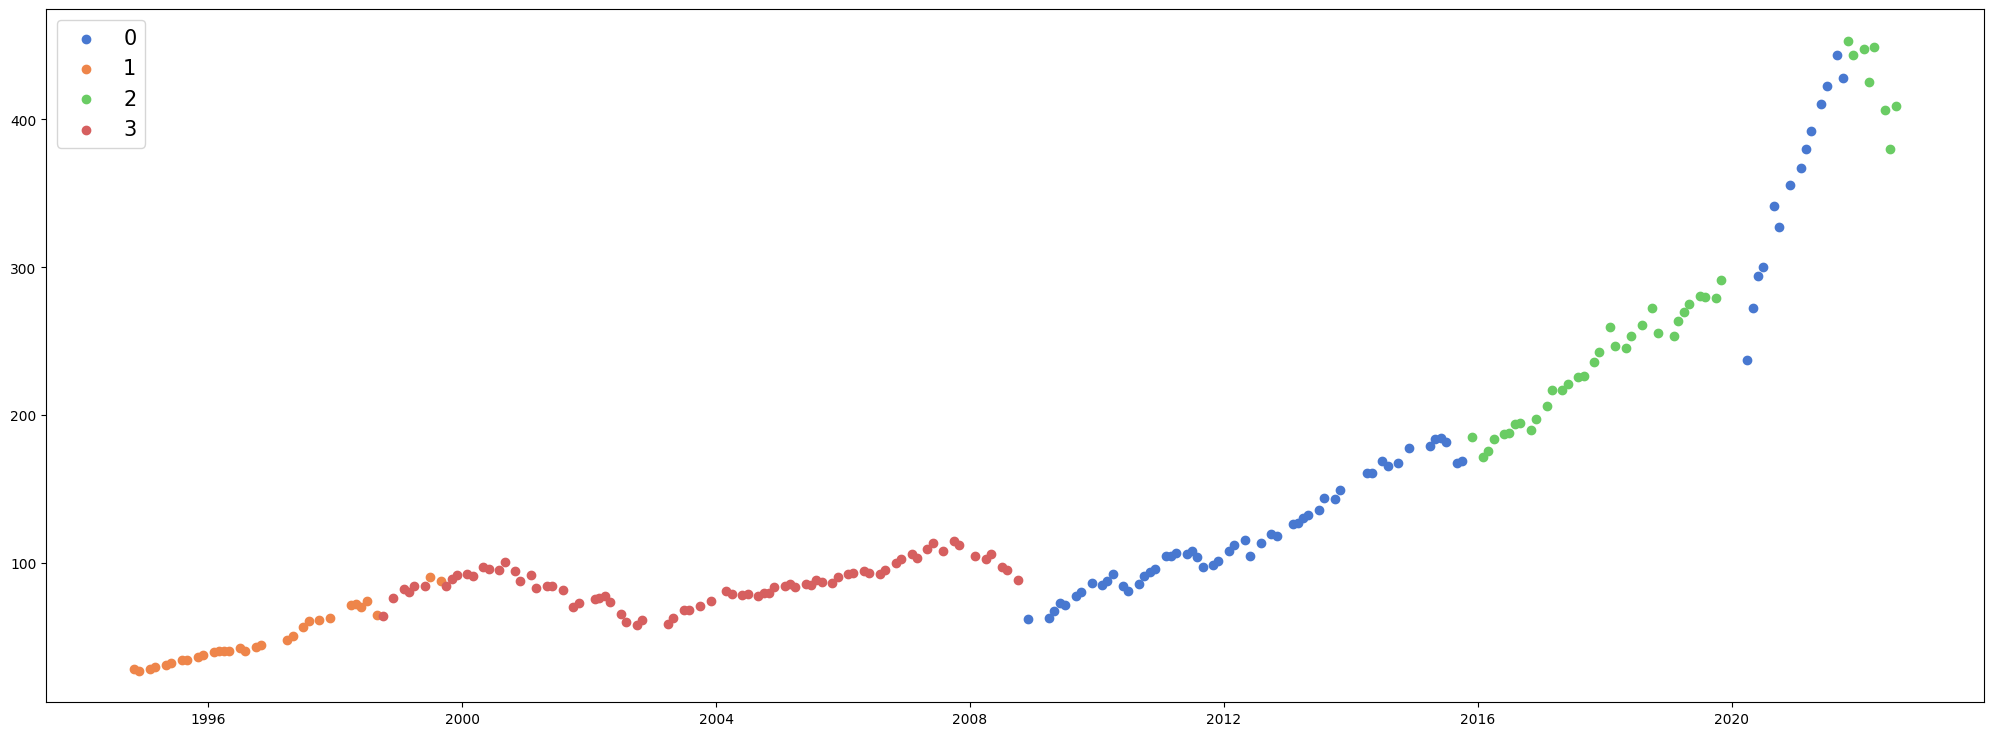

In [8]:
plot_df = eco_sub_df.copy(deep=True)
plot_df['Adj Close'] = spy['Adj Close']
plot_df['return'] = spy['return']
plot_df['state'] = y

slice_scatter_plot = plot_regimes(plot_df, 4)

In [9]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
1993-03-15,45.06250,45.31250,45.06250,45.31250,26.126850,310800,0.004840
1993-03-16,45.31250,45.43750,45.31250,45.31250,26.126850,30800,0.000000
1993-03-17,45.25000,45.25000,44.96875,45.03125,25.964674,21800,-0.006227
1993-03-18,45.21875,45.50000,45.21875,45.31250,26.126850,59300,0.006227
1993-03-19,45.28125,45.28125,45.03125,45.03125,26.087301,66900,-0.001515


In [10]:
spy_indic_df.head()

,sma5,sma30,std15,std30,H-L,C-O,ewm15,rsi,will_r,sar,adx
Date,,,,,,,,,,,
1993-03-15,45.45000,44.616667,0.619492,0.682680,0.25000,0.25000,44.811189,57.679500,-25.000000,44.681466,14.282526
1993-03-16,45.39375,44.652083,0.525282,0.690517,0.12500,0.00000,44.847421,57.679500,-30.909091,44.812500,13.860064
1993-03-17,45.26250,44.675000,0.480430,0.691339,0.28125,-0.21875,44.860578,53.033487,-49.056604,44.956875,13.080462
1993-03-18,45.21250,44.691667,0.439039,0.700731,0.28125,0.09375,44.892633,56.782391,-32.692308,44.968750,12.491556
1993-03-19,45.20000,44.692708,0.392036,0.701229,0.25000,-0.25000,44.902384,52.287696,-50.980392,44.968750,11.684755


In [11]:
spy_indic_df['sma5'] = (spy_indic_df['sma5']-spy_indic_df['sma5'].shift(1))/spy_indic_df['sma5']
sel_cols = ['sma5', 'std15', 'H-L', 'C-O', 'rsi']
sel_df = spy_indic_df[sel_cols].dropna()
spy = spy[spy.index >= sel_df.index[0]]

In [12]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(sel_df)

In [13]:
model = mix.GaussianMixture(n_components=5, 
                            covariance_type="full", 
                            random_state=20,
                            n_init=100).fit(X)
y = model.predict(X)

In [14]:
# a plot function
def plot_regimes(df, num_regimes):
    fig = plt.figure(figsize=(25,9))
    colors = sns.color_palette("muted", num_regimes)
    for i in range(0, num_regimes):
        tmp = df[df["state"]==i]['Adj Close']
        tmp = tmp.asfreq('D')
        plt.scatter(tmp.index, tmp, color = colors[i], label=i)
        plt.legend(prop={'size': 15})
    return fig

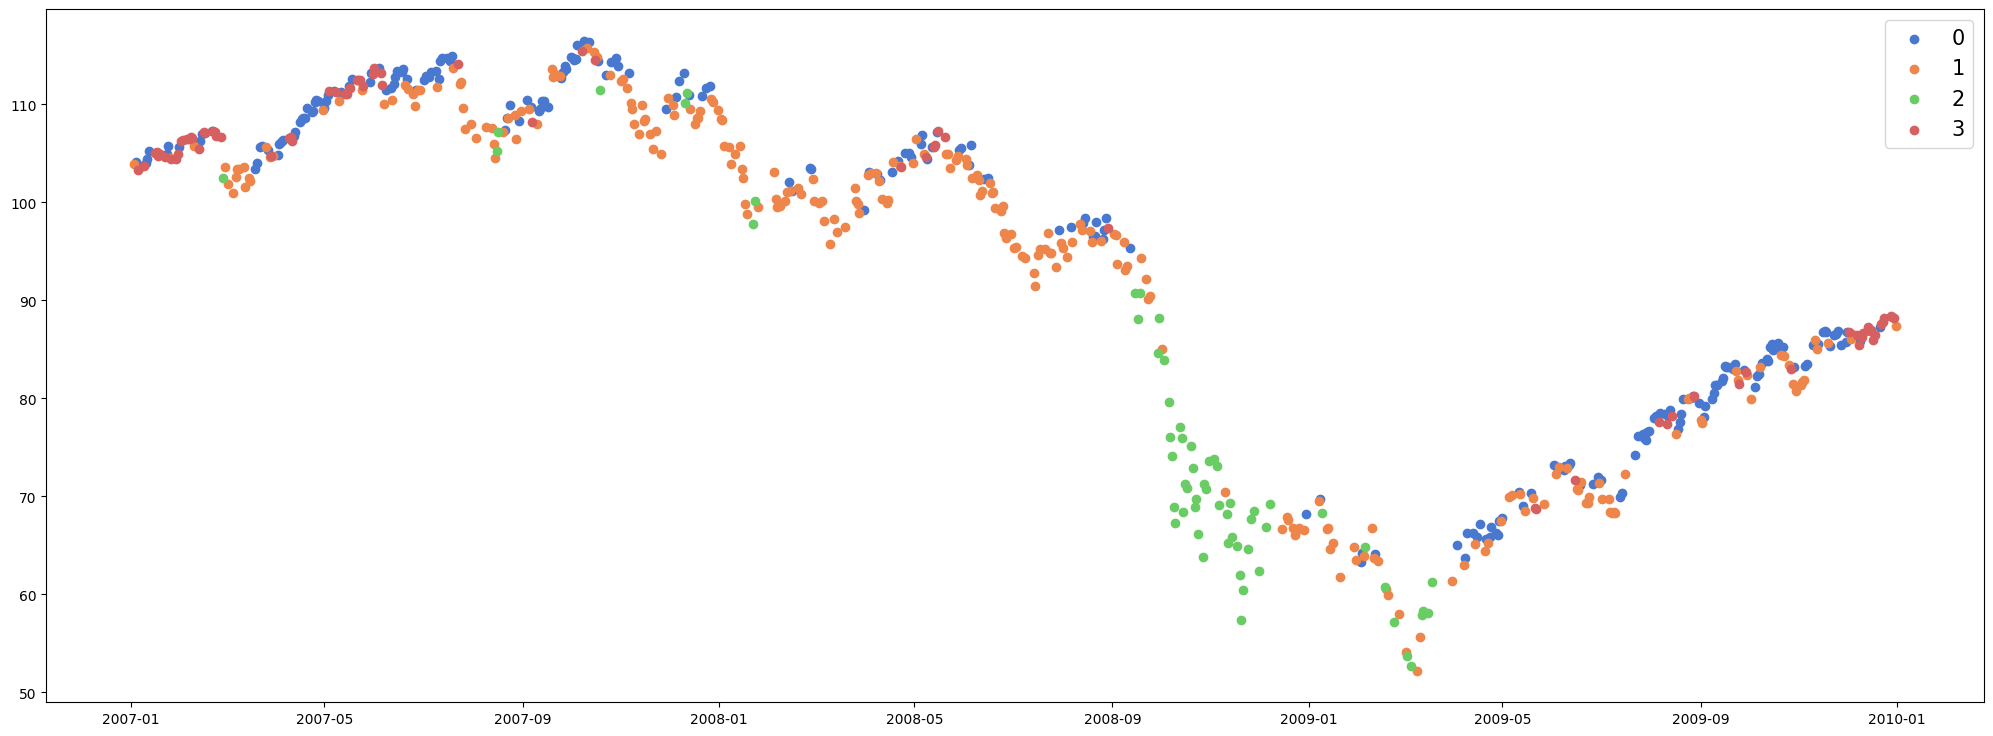

In [15]:
plot_df = sel_df.copy(deep=True)
plot_df['Adj Close'] = spy['Adj Close']
plot_df['return'] = spy['return']
plot_df['state'] = y

slice_scatter_plot = plot_regimes(plot_df[(plot_df.index>'2007') & (plot_df.index<'2010')], 4)

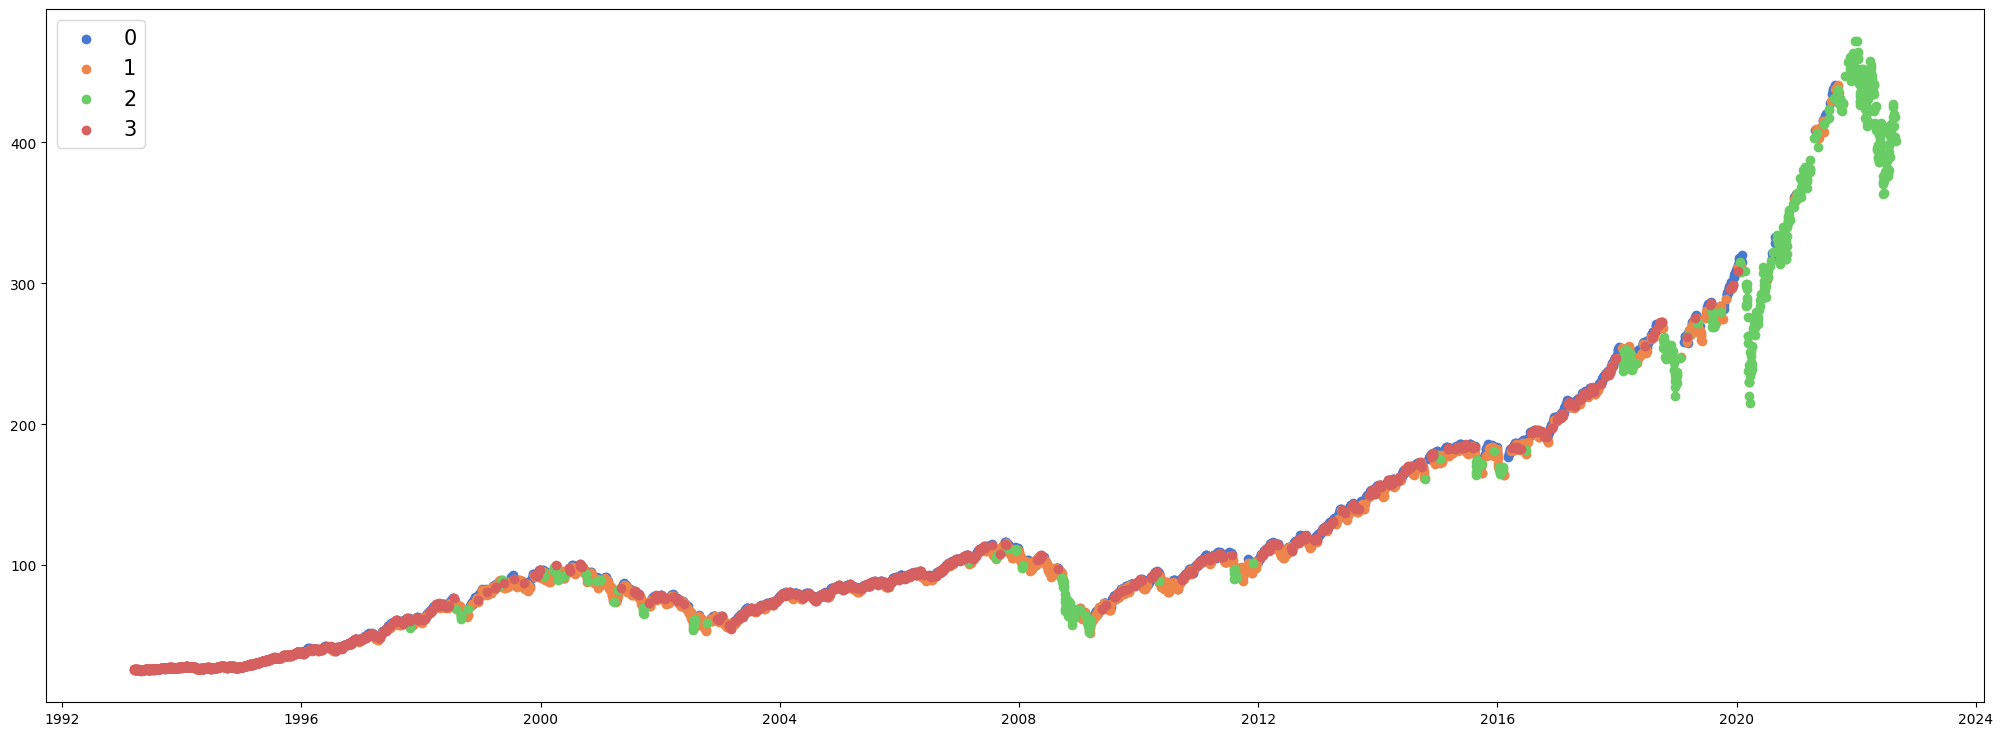

In [16]:
whole_scatter_plot = plot_regimes(plot_df, 4)